In [3]:
# This code takes 1pro_games for top_teams and reorder the players according to their positions

PATH_TO_PRO_GAMES = "../../data/top_teams/1pro_games.json"
PATH_TO_TEAMS = "../../constants/teams.csv"
PATH_OUTPUT_ORDERED = "../../data/top_teams/2pro_games_ordered.json"
PATH_OUTPUT_ORDERED_FLAT = "../../data/top_teams/2Xpro_games_flat.json"

import json
import pandas as pd
import dotabet

# Load the Dota 2 matches from JSON
with open(PATH_TO_PRO_GAMES, 'r') as file:
    matches = json.load(file)

# Load the team compositions from CSV
teams_df = pd.read_csv(PATH_TO_TEAMS)

# Helper function to find the player ID by team ID and position
def find_player_id_by_position(team_id, position, teams_df):
    row = teams_df[teams_df['Team ID'] == team_id]
    if not row.empty:
        player_id_col = f'Pos{position}ID'
        if player_id_col in row:
            return row.iloc[0][player_id_col]
    return None

flattened_matches = []
for match in matches:
    team_ids = [match['radiant_team_id'], match['dire_team_id']]
    
    for team_id in team_ids:
        # Find the correct order of player IDs for the team
        correct_order_ids = [find_player_id_by_position(team_id, pos, teams_df) for pos in range(1, 6)]
        # Reorder the players list based on the correct order
        match['players'] = sorted(match['players'], key=lambda x: correct_order_ids.index(x['account_id']) if x['account_id'] in correct_order_ids else -1)

    flat_dict = dotabet.utils.flatten_dict(match)
    flattened_matches.append(flat_dict)

with open(PATH_OUTPUT_ORDERED, 'w') as file:
    json.dump(matches, file)
    
with open(PATH_OUTPUT_ORDERED_FLAT, 'w') as file:
    json.dump(flattened_matches, file)

print(f"Done reordering players in {len(matches)} matches.")


Done reordering players in 1111 matches.


In [4]:
[find_player_id_by_position(8261500, pos, teams_df) for pos in range(1, 6)]

[898754153, 137129583, 129958758, 157475523, 143693439]

In [5]:
[find_player_id_by_position(9255039, pos, teams_df) for pos in range(1, 6)]

[904131336, 312436974, 168126336, 175311897, 1125580424]

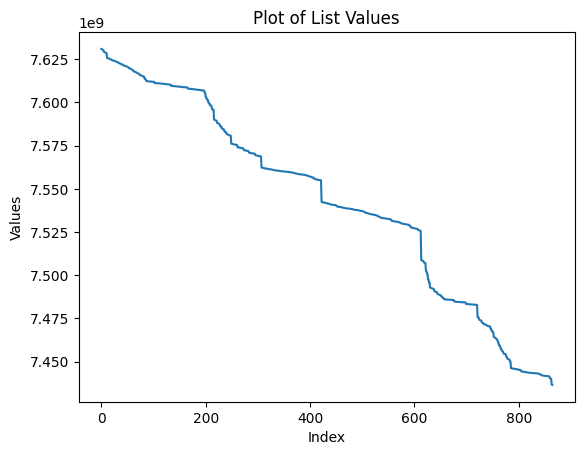

In [3]:
import matplotlib.pyplot as plt

values =  [m['match_id'] for m in matches]

# Plotting
plt.plot(values)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plot of List Values')
plt.show()

In [1]:
PATH_TO_PRO_GAMES = "../../data/top_teams/1pro_games.json"
PATH_TO_TEAMS = "../../constants/teams.csv"
PATH_OUTPUT_ORDERED = "../../data/top_teams/2pro_games_ordered.json"
PATH_OUTPUT_ORDERED_FLAT = "../../data/top_teams/2Xpro_games_flat.json"

import json
import pandas as pd
import dotabet

with open(PATH_TO_PRO_GAMES, 'r') as file:
    matches = json.load(file)

In [7]:
[m for m in matches if m['match_id'] == 7611251957][0]

{'match_id': 7611251957,
 'dire_captain': 54580962,
 'dire_name': 'Team Liquid',
 'dire_team_id': 2163,
 'game_mode': 2,
 'leagueid': 16201,
 'start_time': 1709064647,
 'lobby_type': 1,
 'metadata': None,
 'patch': 54,
 'picks_bans': [{'is_pick': False, 'hero_id': 114, 'team': 1, 'order': 0},
  {'is_pick': False, 'hero_id': 66, 'team': 0, 'order': 1},
  {'is_pick': False, 'hero_id': 73, 'team': 0, 'order': 2},
  {'is_pick': False, 'hero_id': 129, 'team': 1, 'order': 3},
  {'is_pick': False, 'hero_id': 33, 'team': 0, 'order': 4},
  {'is_pick': False, 'hero_id': 65, 'team': 0, 'order': 5},
  {'is_pick': False, 'hero_id': 49, 'team': 1, 'order': 6},
  {'is_pick': True, 'hero_id': 46, 'team': 1, 'order': 7},
  {'is_pick': True, 'hero_id': 19, 'team': 0, 'order': 8},
  {'is_pick': False, 'hero_id': 48, 'team': 1, 'order': 9},
  {'is_pick': False, 'hero_id': 110, 'team': 1, 'order': 10},
  {'is_pick': False, 'hero_id': 50, 'team': 0, 'order': 11},
  {'is_pick': True, 'hero_id': 9, 'team': 0,